DSC550<br>
1/14/2021<br>
Michael Hotaling

# Case Study:  Testing  Hypothesis

### Hypothesis:  Articles about Climate Change are more likely to be published by "Liberal" sources

NOTE: This case study is not complete!  We are only using the first part of it to practice Graphic Analytics.


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt

### **Step 1:  Load data into a dataframe**

In [2]:
addr1 = "articles1.csv"
articles = pd.read_csv(addr1, index_col=0)
articles.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


### **Step 2:  Check the dimension of the table/look at the data**

In [3]:
print("This dataset has {} rows and {} columns".format(articles.shape[0], articles.shape[1]))

This dataset has 50000 rows and 9 columns


**What type of variables are in the table?**

In [4]:
print("Describe Data")
articles.describe()

Describe Data


,id,year,month,url
count,50000.000000,50000.000000,50000.000000,0.0
mean,44432.454800,2016.273700,5.508940,NaN
std,15773.615179,0.634694,3.333062,NaN
min,17283.000000,2011.000000,1.000000,NaN
25%,31236.750000,2016.000000,3.000000,NaN
50%,43757.500000,2016.000000,5.000000,NaN
75%,57479.250000,2017.000000,8.000000,NaN
max,73469.000000,2017.000000,12.000000,NaN


In [5]:
print("Summarized Data")
articles.describe(include=['O'])

Summarized Data


,title,publication,author,date,content
count,50000,50000,43694,50000,50000
unique,49920,5,3603,983,49888
top,The 10 most important things in the world righ...,Breitbart,Breitbart News,2016-08-22,advertisement
freq,7,23781,1559,221,42


The dataframe contains information about news articles. The information we have available is the title of the article, the date it was published, the authors name, which publication company it originated from, and the contents of the article in a string

**Display length of data**

This is the same number as the number of rows in our dataframe


In [6]:
len(articles)

50000

**Display publishers (publications)**


In [7]:
[i for i in articles['publication'].unique()]

['New York Times', 'Breitbart', 'CNN', 'Business Insider', 'Atlantic']

**Display min, max of years published**


In [8]:
print(articles['year'].min())
print(articles['year'].max())

2011.0
2017.0


**Display how many articles from each year**


In [9]:
articles['year'].value_counts().sort_index()

2011.0        1
2012.0       26
2013.0      212
2014.0       76
2015.0     3326
2016.0    28451
2017.0    17908
Name: year, dtype: int64

### Step 3:  Create some bar charts to show articles
**Display bar chart of articles sorted by Publication Name**


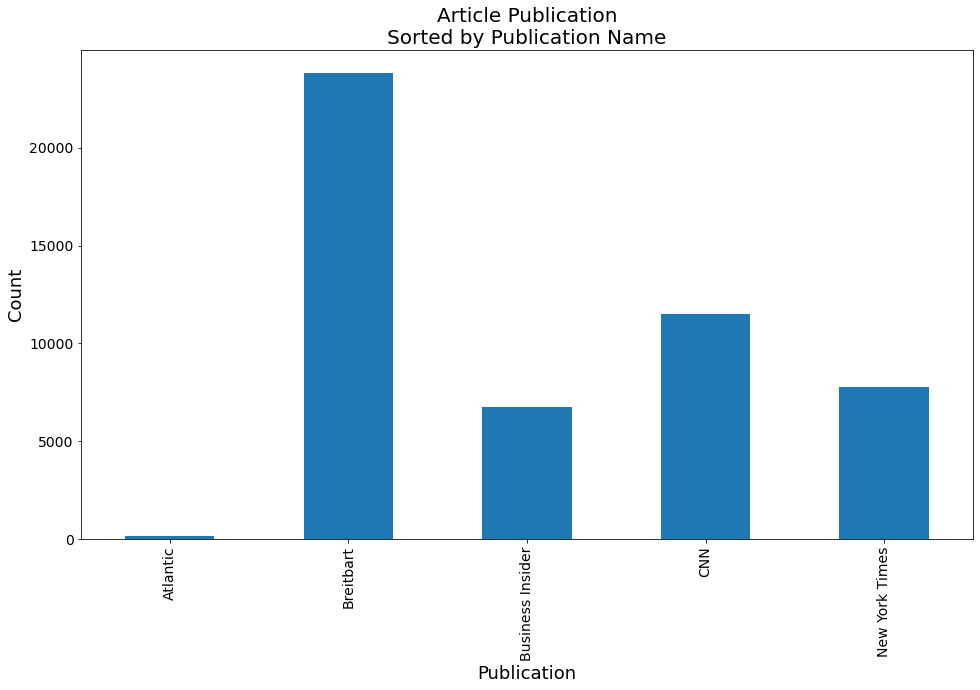

In [10]:
ax = articles['publication'].value_counts().sort_index(ascending=True).plot(kind='bar', fontsize=14, figsize=(16,9))
ax.set_title('Article Publication\nSorted by Publication Name', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

**Display bar chart of articles sorted by counts**


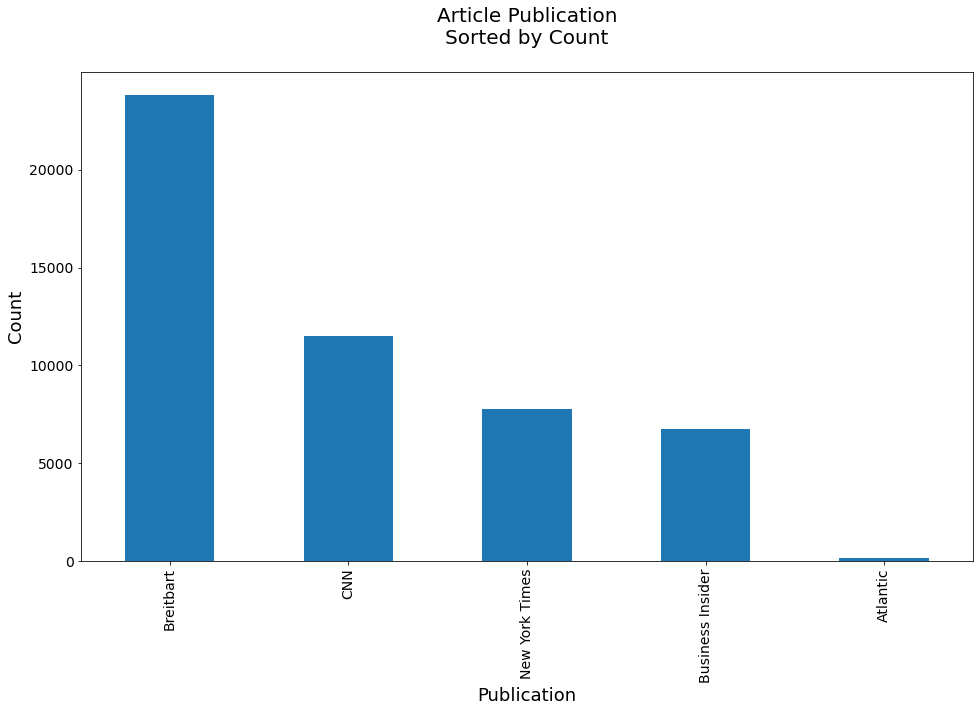

In [11]:
ax = articles['publication'].value_counts().sort_values(ascending=False).plot(kind='bar', fontsize=14, figsize=(16,9))
ax.set_title('Article Publication\nSorted by Count\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

###  Step 4:  Clean text:  No punctuation and all lowercase

In [12]:
def clean_text(article):
    """Removes punctuation and converts all characters to lowercase"""
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [13]:
# Using apply to convert the content into a tokenized clean version for our corpus
articles['tokenized'] = articles['content'].apply(clean_text)

In [14]:
# Randomly select an article to show all captitalization and punctuation was removed
print(articles['tokenized'].values[np.random.randint(0,50001)][:300],"...")

for the past five years solar and wind energy have exploded in popularity in the united states since the election of donald trump energy analysts have been trying to figure out if that trend will continue some analysts argue that the trend is irreversible the cost of solar and wind power are falling ...


**Look at mean, min, max article lengths**

In [15]:
articles['num_words'] = articles['tokenized'].apply(lambda x: len(x.split()))
print("Mean:",articles['num_words'].mean())
print("Standard Deviation:",articles['num_words'].std())
print("Min:",articles['num_words'].min())
print("Max:",articles['num_words'].max())

Mean: 636.26046
Standard Deviation: 644.8566193362504
Min: 0
Max: 24736


### Step 5:  Remove articles with no words

In [16]:
articles[articles['num_words'] == 0]

,id,title,publication,author,date,year,month,url,content,tokenized,num_words
41452,60381,Wonders of the universe,CNN,NaN,2014-01-10,2014.0,1.0,NaN,,,0
41809,60745,The week in 32 photos,CNN,NaN,2015-01-23,2015.0,1.0,NaN,,,0
44395,63359,Enchanting waterfront murals painted while bal...,CNN,Jacopo Prisco,2015-06-01,2015.0,6.0,NaN,,,0
46201,65236,We tried KFC’s latest take on a trendy regiona...,Business Insider,NaN,2017-01-26,2017.0,1.0,NaN,’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’ ’ ’ ’ ’’ ’’,,0
46251,65296,PAPA JOHN’S CEO: America is on a path to becom...,Business Insider,NaN,2017-01-30,2017.0,1.0,NaN,’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’’,,0
...,...,...,...,...,...,...,...,...,...,...,...
51131,70925,Real estate prices could drop by 5%,Business Insider,NaN,2016-08-05,2016.0,8.0,NaN,’ ’ ’ ’ ’ ’,,0
51139,70933,Any of these 7 gadgets will make your desk a m...,Business Insider,NaN,2016-08-05,2016.0,8.0,NaN,’’ ’’ ’’ ’ ’ ’’ ’’ ’’ ’’ ’’ ’’ ’’ ’ ’ ’ ’,,0
51712,71588,Robots are invading big box stores and want to...,Business Insider,Dan Bobkoff,2016-09-15,2016.0,9.0,NaN,’’,,0
51775,71661,’It’s like everything’s being dumbed-down’: Ma...,Business Insider,Allan Smith,2016-09-21,2016.0,9.0,NaN,’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’ ’...,,0


In [17]:
articles = articles[articles['num_words'] != 0]

In [18]:
# Checking the new mean, min, and stdev
print("Mean:",articles['num_words'].mean())
print("Standard Deviation:",articles['num_words'].std())
print("Min:",articles['num_words'].min())
print("Max:",articles['num_words'].max())

Mean: 637.0886752778612
Standard Deviation: 644.867202579528
Min: 1
Max: 24736


### Step 6:  Check for Outliers:  show bar graph of outliers

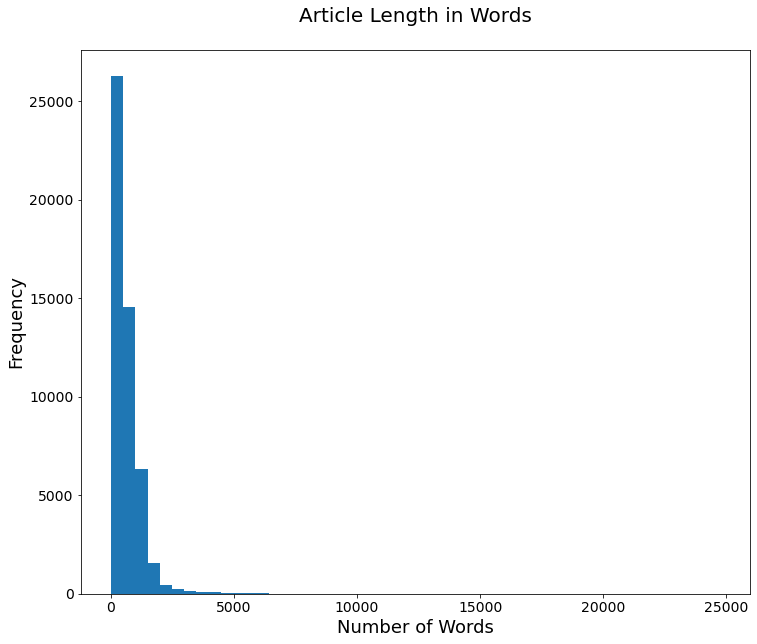

In [19]:
articles['num_words'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
plt.title('Article Length in Words\n', fontsize=20)
plt.ylabel('Frequency', fontsize=18)
# plt.yscale('log')
plt.xlabel('Number of Words', fontsize=18);
plt.show()

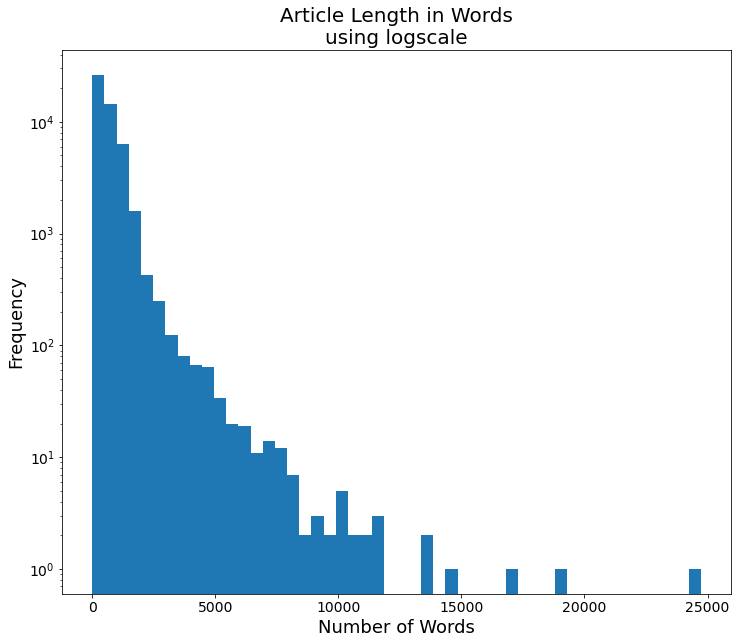

In [20]:
articles['num_words'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
plt.title('Article Length in Words\nusing logscale', fontsize=20)
plt.ylabel('Frequency', fontsize=18)
plt.yscale('log')
plt.xlabel('Number of Words', fontsize=18);
plt.show()

In [21]:
articles[articles['num_words'] > 12500]

,id,title,publication,author,date,year,month,url,content,tokenized,num_words
1162,18600,Full Transcript and Video: Trump News Conferen...,New York Times,NaN,2017-02-17,2017.0,2.0,NaN,President Trump on Thursday announced his new ...,president trump on thursday announced his new ...,13783
6407,24673,The Great A.I. Awakening - The New York Times,New York Times,Gideon Lewis-Kraus,2017-04-08,2017.0,4.0,NaN,"Late one Friday night in early November, Jun R...",late one friday night in early november jun re...,14432
7174,25704,The Fighter - The New York Times,New York Times,C. J. Chivers,2017-04-10,2017.0,4.0,NaN,"Sam Siatta was deep in a tequila haze, so stag...",sam siatta was deep in a tequila haze so stagg...,16979
17535,36274,***Horse Race LiveWire*** 2 Days to South Caro...,Breitbart,Breitbart News,2016-02-16,2016.0,2.0,NaN,Welcome to Breitbart News’s daily live updates...,welcome to breitbart newss daily live updates ...,24736
22226,40973,***Horse Race LiveWire*** Nevada Votes: Trump ...,Breitbart,Breitbart News,2016-02-23,2016.0,2.0,NaN,Welcome to Breitbart News’s daily live updates...,welcome to breitbart newss daily live updates ...,19144
32940,51752,Full transcript: President Donald Trump’s news...,CNN,NaN,2017-02-16,2017.0,2.0,NaN,PRESIDENT DONALD TRUMP HOLDS A NEWS CONFERENCE...,president donald trump holds a news conference...,13758
